# **Setup**

## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

## Load train and test dataset

In [2]:
DATA_PATH = "data"

training = pd.read_csv(f"{DATA_PATH}/training.csv")
test = pd.read_csv(f"{DATA_PATH}/test.csv")

# **Data cleaning I**

## Replace all '?' by NaN and drop rows containing the latter

In [3]:
for data in training:
    training[data].replace(' ?', np.nan, inplace=True)
    
for data in test:
    test[data].replace(' ?', np.nan, inplace=True)
    
nulos = training.isnull().any(axis=1).sum()
total, _ = training.shape
print(f"Percentage of NaN values in the dataset -> {round(nulos/total * 100, 2)}%")

training.dropna(inplace=True)
test.dropna(inplace=True)

Percentage of NaN values in the dataset -> 7.37%


# **Visualize data I**

## Peak dataset

In [4]:
training.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-classification
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Get summary of dataframe

In [5]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    30162 non-null  int64 
 1   workclass              30162 non-null  object
 2   fnlwgt                 30162 non-null  int64 
 3   education              30162 non-null  object
 4   education-num          30162 non-null  int64 
 5   marital-status         30162 non-null  object
 6   occupation             30162 non-null  object
 7   relationship           30162 non-null  object
 8   race                   30162 non-null  object
 9   sex                    30162 non-null  object
 10  capital-gain           30162 non-null  int64 
 11  capital-loss           30162 non-null  int64 
 12  hours-per-week         30162 non-null  int64 
 13  native-country         30162 non-null  object
 14  salary-classification  30162 non-null  object
dtypes: int64(6), object

## Numerical data

In [6]:
numeric_keys_all = training.describe().keys()
numeric_keys = set(numeric_keys_all) - set(['education-num', 'fnlwgt'])
tabela = training[numeric_keys].describe()
tabela.to_latex(buf=f"tables/describe_numerical.tex", caption="Estatísticas descritivas do conjunto de dados", label="tbl:descriptive_statistics")
tabela

,capital-loss,age,hours-per-week,capital-gain
count,30162.000000,30162.000000,30162.000000,30162.000000
mean,88.372489,38.437902,40.931238,1092.007858
std,404.298370,13.134665,11.979984,7406.346497
min,0.000000,17.000000,1.000000,0.000000
25%,0.000000,28.000000,40.000000,0.000000
50%,0.000000,37.000000,40.000000,0.000000
75%,0.000000,47.000000,45.000000,0.000000
max,4356.000000,90.000000,99.000000,99999.000000


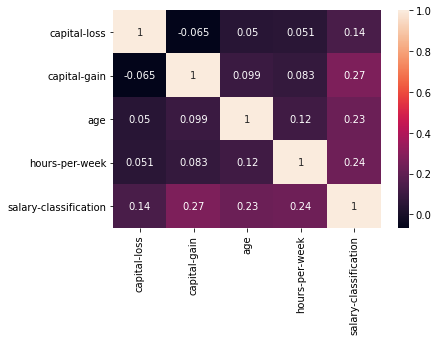

In [7]:
temp_salary = training.replace({"salary-classification": {" <=50K": 0, " >50K": 1}})
heat_map = sns.heatmap(temp_salary[['capital-loss','capital-gain','age','hours-per-week','salary-classification']].corr(method='kendall'), annot=True)
heat_map.get_figure().savefig('images/heatmaps/heatmap_numerical.png', dpi=200, bbox_inches='tight')

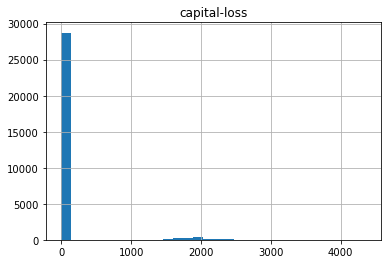

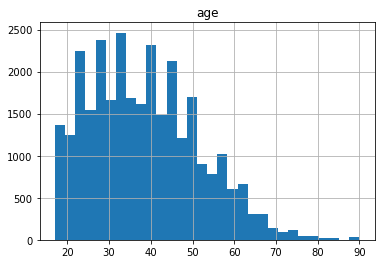

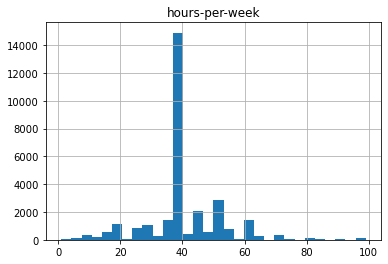

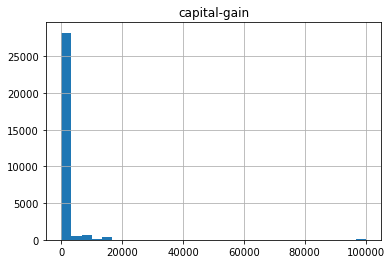

In [8]:
for key in training[numeric_keys].keys():
    training[numeric_keys].hist(column=key,bins=30)
    plt.savefig(f'images/histograms/{key}.png', dpi=200)

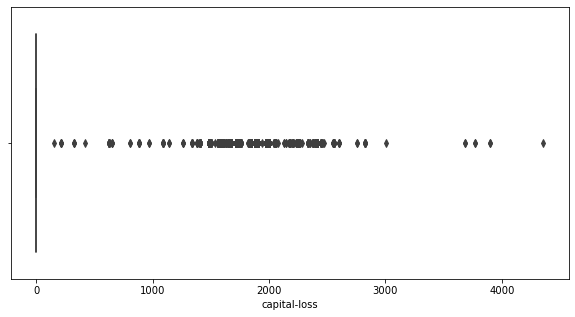

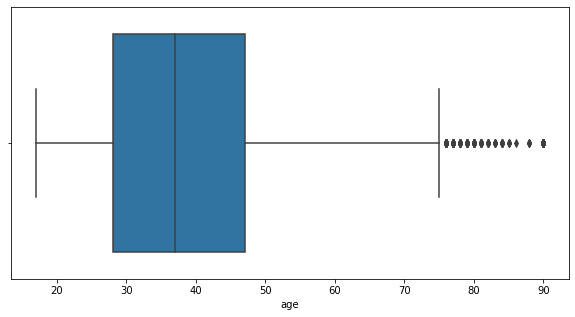

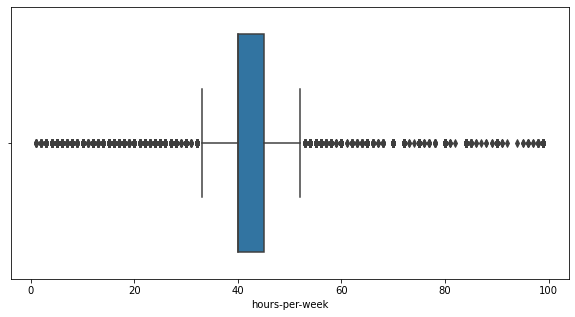

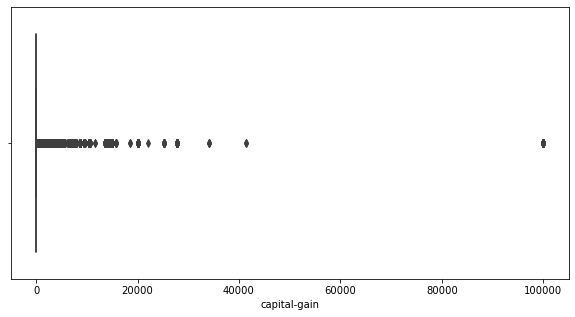

In [9]:
for key in training[numeric_keys].keys():
    fig, ax = plt.subplots(figsize=(10,5))
    sns.boxplot(x=training[key])
    plt.savefig(f'images/boxes/{key}.png', dpi=200)

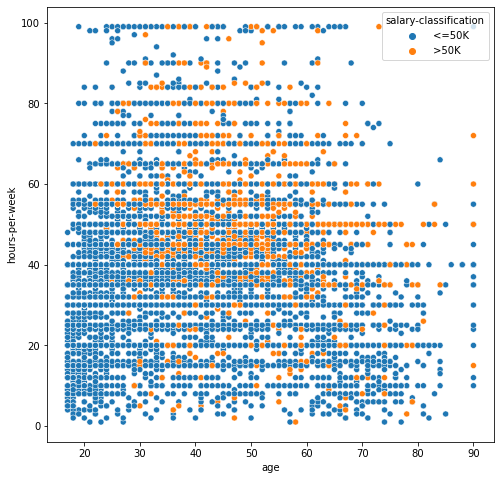

In [10]:
fig, ax = plt.subplots(figsize=(8,8))
agehours = sns.scatterplot(data=training, x="age", y="hours-per-week", hue="salary-classification", ax=ax)
agehours.get_figure().savefig('images/other/age_hours.png', dpi=200)

## Categorical data

In [11]:
for key in set(training.keys()) - set(numeric_keys_all):
    table = training[key].value_counts()
    table.to_latex(buf=f"tables/{key}.tex")
    print(table)
    print()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 El-Salvador                     100
 India                           100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Haiti                            42
 Taiwan                           42
 Iran                             42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

<AxesSubplot:ylabel='race'>

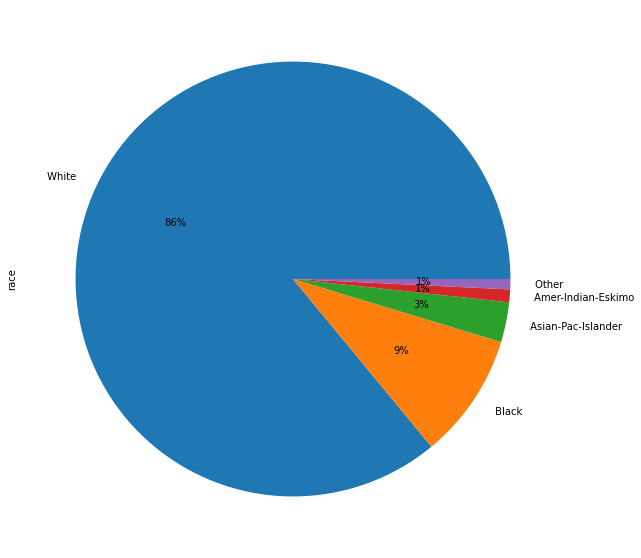

In [12]:
fig, ax = plt.subplots(figsize=(10,10))

training['race'].value_counts().plot.pie(autopct='%1.0f%%',ax=ax)

# **Data cleaning II**

## Remove unnecessary columns

In [13]:
training = training.drop("education", 1)
test = test.drop("education", 1)

# **Prepare data I**

## Discretize values

In [14]:
def discretizer(data, var, bins, group_names):
    bin_value = bins
    group = group_names
    data[var] = pd.cut(data[var], bin_value, labels=group)  
    
def occupation_discretizer(x):
    if re.search('managerial', x):
        return 'Highskill'
    elif re.search('specialty',x):
        return 'Highskill'
    else:
        return 'Lowskill'
    
def workclass_discretizer(x):
    if re.search('Private', x):
        return 'Private'
    elif re.search('Self', x):
        return 'selfempl'
    elif re.search('gov', x):
        return 'gov'
    else:
        return 'others'    

In [15]:
# hours-per-week
discretizer(training, 'hours-per-week', [0,35,40,60,100], ['Low', 'Medium', 'High','VeryHigh'])
discretizer(test, 'hours-per-week', [0,35,40,60,100], ['Low', 'Medium', 'High','VeryHigh'])

# age
discretizer(training, 'age', [16,30,55,91], ['Young', 'Middle_aged', 'Old'])
discretizer(test, 'age', [16,30,55,91], ['Young', 'Middle_aged', 'Old'])

# occupation
training['occupation']=training.occupation.apply(lambda x: x.strip()).apply(lambda x: occupation_discretizer(x))
test['occupation']=test.occupation.apply(lambda x: x.strip()).apply(lambda x: occupation_discretizer(x))

# workclass
training['workclass']=training.workclass.apply(lambda x: x.strip()).apply(lambda x: workclass_discretizer(x))
test['workclass']=test.workclass.apply(lambda x: x.strip()).apply(lambda x: workclass_discretizer(x))

# marital-status
training['marital-status']=training['marital-status'].apply(lambda x: 'Married' if x.startswith('Married',1) else 'Single')
test['marital-status']=test['marital-status'].apply(lambda x: 'Married' if x.startswith('Married',1) else 'Single')

# race
training['race']=training['race'].apply(lambda x: 'White' if x==' White' else 'Other')
test['race']=test['race'].apply(lambda x: 'White' if x==' White' else 'Other')

# native-country
training['native-country']=training['native-country'].apply(lambda x: 'Native' if x==' United-States' else 'Imigrant')
test['native-country']=test['native-country'].apply(lambda x: 'Native' if x==' United-States' else 'Imigrant')

# **Visualize data II**

In [16]:
without_salary = set(training.keys()) - set(['salary-classification'])

for key in set(without_salary) - set(numeric_keys_all):
    table = pd.crosstab(training[key], training['salary-classification'])
    table.to_latex(buf=f"tables/{key}-categorical.tex")
    print(table)
    print()

salary-classification   <=50K   >50K
native-country                      
Imigrant                 2145    513
Native                  20509   6995

salary-classification   <=50K   >50K
sex                                 
 Female                  8670   1112
 Male                   13984   6396

salary-classification   <=50K   >50K
workclass                           
Private                 17410   4876
gov                      2971   1318
others                     14      0
selfempl                 2259   1314

salary-classification   <=50K   >50K
race                                
Other                    3560    669
White                   19094   6839

salary-classification   <=50K   >50K
marital-status                      
Married                  8016   6440
Single                  14638   1068

salary-classification   <=50K   >50K
relationship                        
 Husband                 6784   5679
 Not-in-family           6903    823
 Other-relative           854    

# **Prepare data II**

## Encode values

In [17]:
encoding = {"age": {"Young": 0, "Middle_aged": 1, "Old": 2},
            "hours-per-week": {"Low": 0, "Medium": 1, "High": 2, "VeryHigh": 3},
            "marital-status": {"Married": 0, "Single": 1},
            "race": {"White": 0, "Other": 1},
            "occupation": {"Lowskill": 0, "Highskill": 1},
            "sex": {" Male": 0, " Female": 1},
            "native-country": {"Native": 0, "Imigrant":1},
            "salary-classification": {" <=50K": 0, " >50K": 1}}

training = training.replace(encoding)
test = test.replace(encoding)

training = pd.get_dummies(training, columns=['workclass','relationship'])
test = pd.get_dummies(test, columns=['workclass','relationship'])

In [18]:
# Melhorar daqui para baixo

In [19]:
#for key in training.describe().keys():
#    fig, ax = plt.subplots(figsize=(10,5))
#    sns.boxplot(x=training[key])
#    plt.show()
#    plt.savefig(f'images/{key}-box.png')

In [20]:
#fig, ax = plt.subplots(figsize=(15,15))
#heat_map = sns.heatmap(training.corr(method='kendall'), annot=True, ax=ax)
#heat_map.get_figure().savefig('images/heatmap.png')

In [21]:
#sns.set_style('whitegrid')
#ax = sns.countplot(x='salary-classification',hue='workclass',data=training.loc[training['salary-classification'] == 0])
#ax.get_figure().savefig('images/salary0work.png')

In [22]:
#sns.set_style('whitegrid')
#ax = sns.countplot(x='salary-classification',hue='workclass',data=training.loc[training['salary-classification'] == 1])
#ax.get_figure().savefig('images/salary1work.png')

In [23]:
#salary0education = sns.countplot(y='salary-classification',hue='education-num',data=training.loc[training['salary-classification'] == 0])
#salary0education.get_figure().savefig('images/salary0education.png')

In [24]:
#salary1education = sns.countplot(y='salary-classification',hue='education-num',data=training.loc[training['salary-classification'] == 1])
#salary1education.get_figure().savefig('images/salary1education.png')